In [ ]:
#import dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [ ]:
#Use to allow colab access to GoogleDrive

from google.colab import drive
drive.mount('/content/drive')

import glob

# Search for the file across all of MyDrive
file_path = glob.glob('/content/drive/MyDrive/**/*Happiness_Data.xlsx', recursive=True)
print(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/MyDrive/Colab Notebooks/Project4/Happiness_Data.xlsx']


In [ ]:
import pandas as pd
import os

#Replace Folder Name with actual folder name
file_path = '/content/drive/MyDrive/Colab Notebooks/Project4/Happiness_Data.xlsx'



#Read the excel file
happiness_df = pd.read_excel(file_path)

happiness_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [ ]:
#Use ETL to begin cleaning the data

#Get list of column names
happiness_df.columns.tolist()

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [ ]:
#Rename one of the columns
no_null_happiness_df = happiness_df
no_null_happiness_df = no_null_happiness_df.rename(columns= {"year": "Year"})
no_null_happiness_df.columns.tolist()

['Country name',
 'Year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [ ]:
#Calculate the correlation between Life Ladder and other features

#Import dependencies for possible slope equation, we want to run an anova test
#to see if the features are statistically significant to the happiness/Life Ladder

from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets

clean_happiness_df = no_null_happiness_df

In [ ]:
#Begin with Random Forest Model
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Drop the non-beneficial ID columns, 'Country Name'
complete_happiness_df = no_null_happiness_df.drop(columns = ['Country name', 'Year'])
complete_happiness_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...
2358,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [ ]:
#remove null data, drop all rows with missing data

complete_happiness_df = complete_happiness_df.dropna(how='any')
complete_happiness_df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [ ]:
#Look for missing values
complete_happiness_df.count()

,0
Life Ladder,2097
Log GDP per capita,2097
Social support,2097
Healthy life expectancy at birth,2097
Freedom to make life choices,2097
Generosity,2097
Perceptions of corruption,2097
Positive affect,2097
Negative affect,2097


In [ ]:
# Define features set, Want to predict the overall happiness, (X) Target: Life ladder (happiness), Features are all other columns

X = complete_happiness_df.copy()
X.drop("Life Ladder", axis=1, inplace=True)
X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [ ]:
# Define target vector
y = complete_happiness_df["Life Ladder"].ravel()
y[:5]

<ipython-input-172-d528e1f01d51>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = complete_happiness_df["Life Ladder"].ravel()


array([3.7235899 , 4.40177822, 4.75838089, 3.83171916, 3.78293753])

In [ ]:
#Build Gradient Boosting Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#X, y = make_regression(random_state=0)


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=780)

In [ ]:
y_train

array([5.16687489, 4.82600117, 7.52452087, ..., 7.4589653 , 5.75028229,
       4.78624725])

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
reg = GradientBoostingRegressor(random_state=50, n_estimators=300, learning_rate=0.01, max_depth=3, min_samples_split=2, loss='squared_error', min_samples_leaf=1)

In [ ]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=50)

In [ ]:
training_p = reg.predict(X_test[1:2])
test_p = reg.predict(X_test)


In [ ]:
reg.score(X_test, y_test)

0.8251706372592676

Using a standard scaler when building a gradient boosting regressor is generally not necessary. Gradient boosting algorithms, such as XGBoost or LightGBM, are tree-based methods that are not sensitive to the scale of the input features. These algorithms can handle features of different scales without requiring normalization or standardization.

In [ ]:
# Making predictions using the testing data
test_predictions = reg.predict(X_test)
test_predictions

array([5.40083136, 4.81416657, 4.8227884 , 4.26537363, 6.0732412 ,
       6.01991375, 5.69193187, 4.70002494, 5.0922349 , 4.67945914,
       5.91092498, 6.64399248, 7.05460996, 6.07690902, 5.56556216,
       5.73301963, 4.20055156, 5.99107366, 4.02451511, 4.26537363,
       6.92142568, 4.24699385, 5.11808384, 5.10189362, 5.22390006,
       3.91954934, 5.67795758, 7.15622431, 6.29050525, 4.26136323,
       7.21081705, 4.70045353, 7.28286341, 4.67544874, 5.2807209 ,
       6.96280738, 4.93639725, 6.50480094, 4.73722023, 6.87415011,
       4.57979747, 4.80184551, 4.52713708, 6.63594942, 6.03731135,
       5.05790093, 6.5102235 , 5.69511234, 5.06188801, 5.65128875,
       6.3714665 , 4.5606777 , 4.60382337, 6.37150119, 5.70462738,
       5.13109469, 4.60454573, 4.07760599, 7.06657887, 4.83913043,
       6.96315789, 6.59410056, 5.30959874, 6.53363174, 6.55184087,
       4.61828325, 4.83766141, 4.60370345, 4.94831417, 4.60185287,
       6.64754081, 6.87303068, 4.6749249 , 6.64785662, 6.23227

In [ ]:
# Calculating the accuracy score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
mae

0.36450860849296957

In [ ]:
#Calculate the mse and rmse
from sklearn.metrics import mean_squared_error

y_actual = y_test
# Calculate MSE
mse = mean_squared_error(y_actual, test_predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.2243810539360351
Root Mean Squared Error (RMSE): 0.47368877328477516


In [ ]:
y_actual


array([4.60221815, 4.46454096, 5.06616449, 4.92723608, 6.67983103,
       6.0910821 , 5.72216272, 4.44130611, 5.99571276, 4.52151775,
       6.46395254, 7.66239738, 7.22568798, 5.54768229, 5.57726336,
       6.49215603, 4.30568314, 6.27294064, 3.3555634 , 4.44482708,
       7.60417318, 4.18094349, 4.90916586, 4.71678305, 5.25219297,
       4.15609026, 5.49528885, 7.24136257, 6.14759016, 2.90273428,
       7.40561628, 5.83087063, 7.00690413, 3.81806874, 5.76742887,
       7.28038597, 4.99531794, 6.44446468, 5.11717796, 7.31415129,
       4.24044132, 4.75038385, 4.26267147, 6.61952496, 6.52514601,
       5.17238045, 6.33690214, 5.37444639, 5.79226255, 5.85175371,
       6.77580547, 5.45114708, 4.74140835, 6.58226013, 6.33931828,
       5.27194405, 4.27103806, 4.09743595, 6.76008511, 4.77531672,
       7.4518795 , 7.07665825, 5.76972342, 6.56104183, 6.2381978 ,
       3.50200295, 4.70974588, 4.19691277, 4.49301004, 5.01337481,
       6.35762501, 6.72453117, 4.12829876, 7.0974555 , 6.24511

In [ ]:
test_predictions

array([5.40083136, 4.81416657, 4.8227884 , 4.26537363, 6.0732412 ,
       6.01991375, 5.69193187, 4.70002494, 5.0922349 , 4.67945914,
       5.91092498, 6.64399248, 7.05460996, 6.07690902, 5.56556216,
       5.73301963, 4.20055156, 5.99107366, 4.02451511, 4.26537363,
       6.92142568, 4.24699385, 5.11808384, 5.10189362, 5.22390006,
       3.91954934, 5.67795758, 7.15622431, 6.29050525, 4.26136323,
       7.21081705, 4.70045353, 7.28286341, 4.67544874, 5.2807209 ,
       6.96280738, 4.93639725, 6.50480094, 4.73722023, 6.87415011,
       4.57979747, 4.80184551, 4.52713708, 6.63594942, 6.03731135,
       5.05790093, 6.5102235 , 5.69511234, 5.06188801, 5.65128875,
       6.3714665 , 4.5606777 , 4.60382337, 6.37150119, 5.70462738,
       5.13109469, 4.60454573, 4.07760599, 7.06657887, 4.83913043,
       6.96315789, 6.59410056, 5.30959874, 6.53363174, 6.55184087,
       4.61828325, 4.83766141, 4.60370345, 4.94831417, 4.60185287,
       6.64754081, 6.87303068, 4.6749249 , 6.64785662, 6.23227

In [ ]:
#Calculate R-squared
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, test_predictions)
test_r2

0.8251706372592676

In [ ]:
#overfit check, training > testing
train_predictions = reg.predict(X_train)
training_r2 = r2_score(y_train, train_predictions)
training_r2


0.8524621801922772

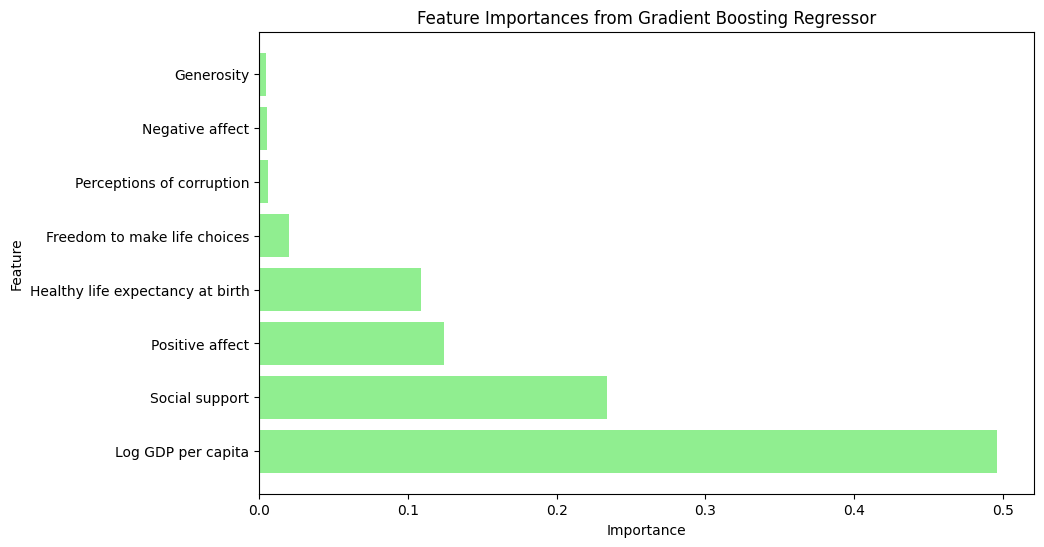

In [ ]:
# Calculate feature importances
importances = reg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='lightgreen')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()